In [1]:
import pandas as pd

In [6]:
X_train, y_train, X_test, y_test = pd.read_pickle('data/click/click.pkl')

In [9]:
from sklearn.linear_model.logistic import LogisticRegression

In [23]:
clf = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1], "penalty": ["l1", "l2"]}
grid_search = GridSearchCV(clf, params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)

In [25]:
print(grid_search.best_params_)

{'C': 1, 'penalty': 'l1'}


In [26]:
clf_best = grid_search.best_estimator_
y_pred = clf_best.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(accuracy, confusion_matrix)
y_pred_proba = clf_best.predict_proba(X_test)

0.83197 [[80838  1672]
 [15131  2359]]


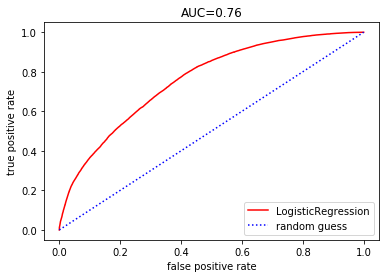

In [28]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="LogisticRegression")
plt.plot([0, 1], [0, 1], "b:", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");
plt.show()